# Regression in Python

<div style="color:#F00"><H1>Wichtig!: bitte ein anderes Dataset aussuchen</h1></div>

Dieses Notebook beinhaltet das Praktische Vorgehen bei dem AUfbau (nicht) linearer Regressionen. Hierfür werden die, in der Arbeit beschriebenen, Pakete NumPy, Pandas, MathPlotLib und SciPy bzw. die funktion curve_fit von dem SciPy Unterpaket SciPy.optimize genutzt. Anzumerken ist, dass die Schritte der Datensammlung und Aufbereitung hier nicht behandelt werden, da dies den Rahmen dieser Arbeit überschreitet. Im folgenden wird ein Datenset genutzt, welches frei Verfügbar auf der Website Kaggle aufzufinden ist. Anzumerken ist, das Grundsätzlich alle erkenntnisse mit dem jeweils notwendigem Fachwissen begutachtet werden müssen, um nicht ehlgeleitete Schlüsse zu ziehen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Welche Daten brauchen wir?

Um dieses Dataset zu nutzen, müssen wir es zu erst importieren. Dies geschieht mittels des Pandas Paket. Die Pandas.read...() funktionen bieten hierfür eine gute leicht nutzbare Möglichkeit

In [21]:
df = pd.read_csv('house_prices.csv')
df = df.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


Nun, da wir die Daten auslesen können, ist es wichtig sich ein Bild von der abhängigen und der einen oder den mehreren unabhängigen Variablen zu machen.

## Wie sehen unsere Daten aus?

In diesem Teil untersuchen wir die Daten nun, um daraufhin zu entscheiden, welche Art von Funktion nötig ist, und um für die folgenden Schätzungen eine bessere Entscheidungsgrundlage zu schaffen. Hierzu plotten wir die Datenpunkte.

Text(0, 0.5, 'sqft_living')

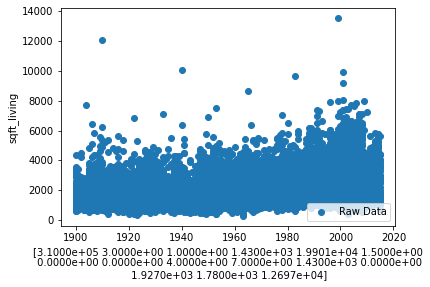

In [34]:
data = df.values
x, y = data[:, 12], data[:, 3]
plt.scatter(x, y, label='Raw Data')
plt.legend(loc='lower right')
plt.xlabel('Year Build')
plt.ylabel('sqft_living')

Diese Datenpunkte lassen einen Linearen Zusammenhang vermuten.

## Linear Regression

In [4]:
linregress(x,y)

LinregressResult(slope=0.48487809831570955, intercept=8.38067418337613, rvalue=0.9603905715943756, pvalue=3.6932450851706876e-09, stderr=0.03760029499619655, intercept_stderr=4.422433932791863)

## How to use: Curve Fitting 

Nun da wir entschieden haben, einen linearen Zusammenhang zu vermuten, ist es an der Zeit die nötigen Parameter für das CurveFitting zu definieren. Mindestens gebraucht werden hierbei die Daten der abhängigen und unabhängigen Variablen wie auch die jeweils gewählte Funktion. 

In [ ]:
def linear_fit(x,m,b):
    return m*x + b

Die Funktion linear_fit hat als Parameter an erster Stelle die unabhängige Variable x und als darauffolgende Parameter die Parameter der Funktion die opmimiert werden sollen. Nun, da die mindestanforderungen für ein CurveFitting erfüllt sind, können wir nun die Funktion nutzen.

In [ ]:
popt, pcov = curve_fit(linear_fit, x, y)

Die Funktion curve_fit gibt im normalfall 2 werte zurück. Popt und pcov. Popt beinhaltet ein Array bestehend aus den optimalen Werten für die Parameter der linear_fit Funktion.

In [ ]:
m, b = popt
print(f"m: {m.round(2)} & b: {b.round(2)}")

Pcov ist die vermutete Covarianz von popt, aus welcher man z.B. die Standardabweichung bzw. den Fehler ablesen kann. Dies ist hilfreich um das Modell zu bewerten, jedoch wird in weiteren Teilen dieses Notebooks noch auf die Fehleranalyse eingegangen.

Die optimalen Parameter kann man nun für m respektive b einsetzen und die lineare Rergessionsgerade ist fertig.

In [ ]:
print(f"y = {m.round(2)}x + {b.round(2)}")

## Vermutung aufstellen

Beim Curve Fitting ist es häufig Sinnvoll der Funktion curve_fit() erste Schätzungen für die Parameter abzugeben. Diese werden daraufhin von der Funktion mit einbezogen und helfen dabei bessere Fits für die Parameter zu finden. Hierbei ist zu beachten, dass die Qualität der Vermutung die Qualität der von curve_fit() aufgestellten Parameter beeinflusst. Der Parameter p0 der funtion curve_fit nimmt hierbei Beta, also den Vektor an Parametern an. Hierbei muss die Reihenfolge und Anzahl der Parameter die selbe sein, wie die in der definierten Funktion. 

Anmerkung: Wenn keine Vermutung aufgestellt wird wird für jeden parameter der Wert 1 vermutet.

    popt, pcov = curve_fit(linear_fit, x, y) == popt, pcov = curve_fit(linear_fit, x, y, p0=[1, 1])

Aus den scatter Plot kann man vermuten, dass die Population Anzahl doppelt so schnell steigt, wie die der Mitarbeiter, da von 110 bis 120 Population die Werte der Mitarbeiter von ca 61 auf ca 66 steigen. Unsere Vermutung für m wäre daher 0.5. Aus dem Abschnitt, den wir in den Daten haben kann man nicht leicht auf den Y-Achsen Abschnitt (also b) kommen. Aber wenn die erste Annahme von m = 0.5 genutzt wird ergibt sich schnell, dass der Y-Achsenabschnitt bei ca. 6 sein muss (Wenn man von 110 Population für alle 10 an Population weniger 5 an Employee weniger geht).

In [ ]:
popt, pcov = curve_fit(linear_fit, x, y, p0=[0.5, 6])
print("Opmitale Parameter")
print(f"m: {m} & b: {b}")
print("Gerade:")
print(f"y = {m.round(2)}x + {b.round(2)}")

## Nicht lineare Regression

Es gibt bei nicht linearen Regressionen nicht nur die eine, wie es bei Linearen immer eine Form von y = mx + b ist. Zu den Formen nicht linearer Regressionen gehören z.B. Exponentialfunktion, logarythmusfunktionen und andere (aus dem teil von den anderen übernehmen). Wie für verschiedene nicht lineare Funktionen die Bestimmung in der Theorie aussieht wurde in vorherigen Teilen dieser Arbeit definiert, hier wird darauf eingegangen, wie nicht lineare Regressionen pratisch anzuwenden sind und an einem Beispiel erläutet.

Um mit SciPys curve_fit() Funktionen einen nicht Linearen zusammenhang darzustellen gibt es eine naheliegende Lösung. Wie in Vorherigen Teilen dieser Arbeit beschrieben brauchen wir um diese Funktion zu nutzen eine Funktion, welche den Zusammenhang zwischen den Daten beschreiben soll. Diese Funktion muss aber nicht linear sein, und kann jeden beliebigen Zusammenhang darstellen. Im folgenden wird jede besprochene Form einer nicht linearen Regression Vorgestellt.

### Exponentielle Regression

In [ ]:
def exponential_fit(x,a,b):
    return a * np.power(b,x)

In [ ]:
popt, pcov = curve_fit(exponential_fit, x, y)
a, b = popt
print("Opmitale Parameter")
print(f"a: {a.round(2)} & b: {b.round(2)}")
print("Funktion:")
print(f"f(x) = {a.round(2)} * {b.round(2)}\u02E3")

In [ ]:
x_monotonic = np.arange(min(x),max(x),1)
y_fit = exponential_fit(x_monotonic,*popt)

In [ ]:
plt.plot(x_monotonic,y_fit,'--',color='red',label='Quadratic Fit')
plt.legend(loc='lower right')
plt.scatter(x, y, label='Raw Data')
plt.xlabel('Population')
plt.ylabel('Employed')

### Logarithmische Regression

In [ ]:
def logarithmic_fit(x,b,c):
    return numpy.log(x)

So würde z.B. eine nicht lineare Regression durch unsere Datenpunkte aussehen können. Wenn man sich zwischen verschiedenen Methoden der Regression unsicher ist, kann man die verschiedenen Modelle untersuchen und aus den Kennzahlen Erkentnisse gewinnen